## 1 - Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Overview of the Problem set


Let's get more familiar with the dataset. Load the data by running the following code.

In [2]:
# Loading boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
print("Dataset description : ", boston_dataset.DESCR[:1226])

Dataset description :  .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,00

In [4]:
# Explore the dataset
print("Name   of the features: ", boston_dataset.feature_names)
print("Shape  of the dataset : ", boston_dataset.data.shape)
print("Number of the samples : ", boston_dataset.data.shape[0])
print("Number of the features: ", boston_dataset.data.shape[1])
print("Number of the targets : ", boston_dataset.target.shape)

Name   of the features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Shape  of the dataset :  (506, 13)
Number of the samples :  506
Number of the features:  13
Number of the targets :  (506,)


In [5]:
# Display a portion of the dataset
target_col_name = 'PRICE'
df = pd.DataFrame(np.hstack([boston_dataset.data, boston_dataset.target[:, np.newaxis]]), 
                  columns=np.hstack([boston_dataset.feature_names, target_col_name]))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Note: You should reshape iris target shape from (506,) to (506,1) to treat it as column vector.

## 3 - Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [6]:
df.isnull().sum()
#df.fillna(df.mean(), inplace=True)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## 4 - Splitting Data into Training and Test Sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[boston_dataset.feature_names], df[target_col_name], train_size=0.9, random_state=42)
print("Number of the train samples : ", X_train.shape[0])
print("Number of the test samples : ", X_test.shape[0])

Number of the train samples :  455
Number of the test samples :  51


## 5 - Preprocessing 

### 5.1 Feature Scaling 

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale =  MinMaxScaler()
X_train = min_max_scale.fit_transform(X_train)
X_test = min_max_scale.transform(X_test)
X_train = pd.DataFrame(data=X_train, index=Y_train.index, columns= boston_dataset.feature_names)
X_test = pd.DataFrame(data=X_test, index=Y_test.index, columns= boston_dataset.feature_names)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
281,0.000315,0.2,0.095926,0.0,0.119136,0.652807,0.353244,0.374205,0.173913,0.055344,0.244681,0.988224,0.078918
22,0.013751,0.0,0.274074,0.0,0.314815,0.494539,0.914521,0.258918,0.130435,0.229008,0.893617,1.000000,0.468819
101,0.001183,0.0,0.289630,0.0,0.277778,0.616976,0.704428,0.156999,0.173913,0.375954,0.882979,0.996672,0.163907
268,0.005973,0.2,0.119630,0.0,0.390947,0.748994,0.511843,0.158445,0.173913,0.146947,0.042553,0.983358,0.039459
485,0.041191,0.0,0.642963,0.0,0.407407,0.527112,0.504634,0.260264,1.000000,0.914122,0.808511,0.979121,0.244205


## 5 - Neural Network Model

We are going to build and train a Neural Network with a single hidden layer!


### 5.1 Build NN Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

clf = Sequential()

clf.add(Dense(units=256, activation='relu', input_shape=(13,)))
clf.add(Dense(units=1, activation='linear'))

clf.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

clf.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3584      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### 5.2 Train NN Model

In [11]:
clf.fit(X_train, Y_train, batch_size=32, validation_split=0.2, epochs=1000, verbose=True)

Train on 364 samples, validate on 91 samples
Epoch 1/1000
364/364 [==============================] - 0s 1ms/step - loss: 568.2957 - mae: 21.8376 - val_loss: 477.4724 - val_mae: 20.1454
Epoch 2/1000
364/364 [==============================] - 0s 291us/step - loss: 497.2311 - mae: 20.0537 - val_loss: 413.4433 - val_mae: 18.4233
Epoch 3/1000
364/364 [==============================] - 0s 282us/step - loss: 432.5927 - mae: 18.2664 - val_loss: 352.6557 - val_mae: 16.6220
Epoch 4/1000
364/364 [==============================] - 0s 311us/step - loss: 370.4911 - mae: 16.4277 - val_loss: 294.1167 - val_mae: 14.8261
Epoch 5/1000
364/364 [==============================] - 0s 478us/step - loss: 311.6099 - mae: 14.6119 - val_loss: 240.1513 - val_mae: 12.9728
Epoch 6/1000
364/364 [==============================] - 0s 447us/step - loss: 259.0745 - mae: 12.9645 - val_loss: 194.2596 - val_mae: 11.2833
Epoch 7/1000
364/364 [==============================] - 0s 445us/step - loss: 215.4189 - mae: 11.5743 - v

364/364 [==============================] - 0s 364us/step - loss: 27.1165 - mae: 3.7174 - val_loss: 24.8560 - val_mae: 3.2508
Epoch 60/1000
364/364 [==============================] - 0s 311us/step - loss: 26.7083 - mae: 3.6995 - val_loss: 24.8863 - val_mae: 3.2615
Epoch 61/1000
364/364 [==============================] - 0s 337us/step - loss: 26.5287 - mae: 3.7003 - val_loss: 24.3789 - val_mae: 3.1645
Epoch 62/1000
364/364 [==============================] - 0s 276us/step - loss: 26.4009 - mae: 3.6496 - val_loss: 24.2038 - val_mae: 3.1312
Epoch 63/1000
364/364 [==============================] - 0s 186us/step - loss: 26.2048 - mae: 3.6164 - val_loss: 24.5171 - val_mae: 3.1935
Epoch 64/1000
364/364 [==============================] - 0s 341us/step - loss: 25.8600 - mae: 3.6505 - val_loss: 24.1467 - val_mae: 3.1202
Epoch 65/1000
364/364 [==============================] - 0s 182us/step - loss: 25.8561 - mae: 3.6065 - val_loss: 24.1864 - val_mae: 3.1114
Epoch 66/1000
364/364 [==================

Epoch 118/1000
364/364 [==============================] - 0s 321us/step - loss: 21.7902 - mae: 3.3270 - val_loss: 23.2481 - val_mae: 3.0744
Epoch 119/1000
364/364 [==============================] - 0s 404us/step - loss: 21.6147 - mae: 3.2913 - val_loss: 23.1364 - val_mae: 3.0490
Epoch 120/1000
364/364 [==============================] - 0s 383us/step - loss: 21.6047 - mae: 3.2782 - val_loss: 23.1343 - val_mae: 3.0501
Epoch 121/1000
364/364 [==============================] - 0s 318us/step - loss: 21.6296 - mae: 3.2662 - val_loss: 24.0131 - val_mae: 3.2256
Epoch 122/1000
364/364 [==============================] - 0s 309us/step - loss: 21.7004 - mae: 3.3169 - val_loss: 22.9210 - val_mae: 3.0270
Epoch 123/1000
364/364 [==============================] - 0s 218us/step - loss: 21.4726 - mae: 3.2684 - val_loss: 23.9985 - val_mae: 3.2266
Epoch 124/1000
364/364 [==============================] - 0s 208us/step - loss: 21.6759 - mae: 3.3266 - val_loss: 22.9347 - val_mae: 3.0242
Epoch 125/1000
364/3

364/364 [==============================] - 0s 352us/step - loss: 20.1966 - mae: 3.0719 - val_loss: 21.0668 - val_mae: 2.8980
Epoch 177/1000
364/364 [==============================] - 0s 699us/step - loss: 19.2667 - mae: 3.0523 - val_loss: 23.8410 - val_mae: 3.4098
Epoch 178/1000
364/364 [==============================] - 0s 374us/step - loss: 19.7111 - mae: 3.1529 - val_loss: 22.3072 - val_mae: 3.1567
Epoch 179/1000
364/364 [==============================] - 0s 240us/step - loss: 19.4515 - mae: 3.1461 - val_loss: 21.0520 - val_mae: 2.8985
Epoch 180/1000
364/364 [==============================] - 0s 194us/step - loss: 19.2669 - mae: 3.0723 - val_loss: 21.3101 - val_mae: 2.9475
Epoch 181/1000
364/364 [==============================] - 0s 333us/step - loss: 19.3886 - mae: 3.1035 - val_loss: 22.0454 - val_mae: 3.1016
Epoch 182/1000
364/364 [==============================] - 0s 250us/step - loss: 19.3620 - mae: 3.1283 - val_loss: 21.0740 - val_mae: 2.8950
Epoch 183/1000
364/364 [===========

364/364 [==============================] - 0s 179us/step - loss: 17.4402 - mae: 3.0038 - val_loss: 19.2730 - val_mae: 2.7624
Epoch 235/1000
364/364 [==============================] - 0s 286us/step - loss: 17.3276 - mae: 2.9116 - val_loss: 19.6436 - val_mae: 2.8664
Epoch 236/1000
364/364 [==============================] - 0s 254us/step - loss: 17.2900 - mae: 2.9120 - val_loss: 19.1647 - val_mae: 2.7445
Epoch 237/1000
364/364 [==============================] - 0s 364us/step - loss: 17.4358 - mae: 2.9037 - val_loss: 19.7126 - val_mae: 2.8827
Epoch 238/1000
364/364 [==============================] - 0s 307us/step - loss: 17.2235 - mae: 2.9213 - val_loss: 19.1879 - val_mae: 2.7420
Epoch 239/1000
364/364 [==============================] - 0s 261us/step - loss: 17.1955 - mae: 2.8919 - val_loss: 19.3271 - val_mae: 2.8048
Epoch 240/1000
364/364 [==============================] - 0s 197us/step - loss: 17.4786 - mae: 2.9718 - val_loss: 19.2369 - val_mae: 2.7721
Epoch 241/1000
364/364 [===========

364/364 [==============================] - 0s 233us/step - loss: 15.8245 - mae: 2.7959 - val_loss: 17.8593 - val_mae: 2.6427
Epoch 293/1000
364/364 [==============================] - 0s 329us/step - loss: 15.6873 - mae: 2.7893 - val_loss: 17.9249 - val_mae: 2.6131
Epoch 294/1000
364/364 [==============================] - 0s 152us/step - loss: 15.7175 - mae: 2.7573 - val_loss: 18.2251 - val_mae: 2.7502
Epoch 295/1000
364/364 [==============================] - 0s 338us/step - loss: 15.7382 - mae: 2.7677 - val_loss: 18.2133 - val_mae: 2.7500
Epoch 296/1000
364/364 [==============================] - 0s 248us/step - loss: 15.5783 - mae: 2.7770 - val_loss: 17.9032 - val_mae: 2.7110
Epoch 297/1000
364/364 [==============================] - 0s 181us/step - loss: 15.6759 - mae: 2.7974 - val_loss: 17.6293 - val_mae: 2.6166
Epoch 298/1000
364/364 [==============================] - 0s 256us/step - loss: 15.6230 - mae: 2.7651 - val_loss: 17.7898 - val_mae: 2.7032
Epoch 299/1000
364/364 [===========

364/364 [==============================] - 0s 266us/step - loss: 14.5089 - mae: 2.6695 - val_loss: 16.6476 - val_mae: 2.5778
Epoch 351/1000
364/364 [==============================] - 0s 208us/step - loss: 14.5271 - mae: 2.6722 - val_loss: 16.7483 - val_mae: 2.6234
Epoch 352/1000
364/364 [==============================] - 0s 265us/step - loss: 14.4691 - mae: 2.6599 - val_loss: 16.4168 - val_mae: 2.5221
Epoch 353/1000
364/364 [==============================] - 0s 370us/step - loss: 14.4633 - mae: 2.6688 - val_loss: 16.6202 - val_mae: 2.5731
Epoch 354/1000
364/364 [==============================] - 0s 337us/step - loss: 14.4128 - mae: 2.6706 - val_loss: 16.6438 - val_mae: 2.5778
Epoch 355/1000
364/364 [==============================] - 0s 418us/step - loss: 14.6827 - mae: 2.6944 - val_loss: 16.7711 - val_mae: 2.6225
Epoch 356/1000
364/364 [==============================] - 0s 326us/step - loss: 14.3913 - mae: 2.6694 - val_loss: 16.8557 - val_mae: 2.6415
Epoch 357/1000
364/364 [===========

364/364 [==============================] - 0s 273us/step - loss: 13.7817 - mae: 2.6191 - val_loss: 16.3067 - val_mae: 2.4942
Epoch 409/1000
364/364 [==============================] - 0s 116us/step - loss: 13.8021 - mae: 2.5675 - val_loss: 15.9093 - val_mae: 2.4778
Epoch 410/1000
364/364 [==============================] - 0s 229us/step - loss: 13.6801 - mae: 2.5906 - val_loss: 16.2751 - val_mae: 2.6244
Epoch 411/1000
364/364 [==============================] - 0s 207us/step - loss: 13.7346 - mae: 2.6095 - val_loss: 15.9542 - val_mae: 2.5337
Epoch 412/1000
364/364 [==============================] - 0s 149us/step - loss: 13.6805 - mae: 2.5977 - val_loss: 16.0652 - val_mae: 2.5807
Epoch 413/1000
364/364 [==============================] - 0s 229us/step - loss: 13.5204 - mae: 2.5981 - val_loss: 15.8705 - val_mae: 2.4621
Epoch 414/1000
364/364 [==============================] - 0s 139us/step - loss: 13.5064 - mae: 2.5654 - val_loss: 16.1633 - val_mae: 2.6054
Epoch 415/1000
364/364 [===========

364/364 [==============================] - 0s 203us/step - loss: 13.0408 - mae: 2.5242 - val_loss: 16.2334 - val_mae: 2.7001
Epoch 467/1000
364/364 [==============================] - 0s 192us/step - loss: 12.9275 - mae: 2.5377 - val_loss: 15.4315 - val_mae: 2.4995
Epoch 468/1000
364/364 [==============================] - 0s 165us/step - loss: 12.8420 - mae: 2.5109 - val_loss: 15.4783 - val_mae: 2.4969
Epoch 469/1000
364/364 [==============================] - 0s 161us/step - loss: 12.9773 - mae: 2.5183 - val_loss: 15.4450 - val_mae: 2.4678
Epoch 470/1000
364/364 [==============================] - 0s 175us/step - loss: 12.8559 - mae: 2.5179 - val_loss: 15.2352 - val_mae: 2.4483
Epoch 471/1000
364/364 [==============================] - 0s 157us/step - loss: 12.8734 - mae: 2.5252 - val_loss: 15.3345 - val_mae: 2.4490
Epoch 472/1000
364/364 [==============================] - 0s 232us/step - loss: 12.7400 - mae: 2.4784 - val_loss: 15.4772 - val_mae: 2.5077
Epoch 473/1000
364/364 [===========

364/364 [==============================] - 0s 248us/step - loss: 12.3426 - mae: 2.4727 - val_loss: 15.5925 - val_mae: 2.6070
Epoch 525/1000
364/364 [==============================] - 0s 320us/step - loss: 12.2015 - mae: 2.4587 - val_loss: 15.2544 - val_mae: 2.5378
Epoch 526/1000
364/364 [==============================] - 0s 181us/step - loss: 12.2766 - mae: 2.4703 - val_loss: 16.3750 - val_mae: 2.7663
Epoch 527/1000
364/364 [==============================] - 0s 233us/step - loss: 12.3760 - mae: 2.4820 - val_loss: 15.3058 - val_mae: 2.4873
Epoch 528/1000
364/364 [==============================] - 0s 200us/step - loss: 12.4479 - mae: 2.4766 - val_loss: 15.1794 - val_mae: 2.5073
Epoch 529/1000
364/364 [==============================] - 0s 239us/step - loss: 11.9719 - mae: 2.4365 - val_loss: 17.5103 - val_mae: 2.9810
Epoch 530/1000
364/364 [==============================] - 0s 176us/step - loss: 12.3024 - mae: 2.4566 - val_loss: 15.6083 - val_mae: 2.6233
Epoch 531/1000
364/364 [===========

364/364 [==============================] - 0s 157us/step - loss: 11.9628 - mae: 2.4528 - val_loss: 14.7066 - val_mae: 2.4666
Epoch 583/1000
364/364 [==============================] - 0s 256us/step - loss: 11.9022 - mae: 2.4400 - val_loss: 15.5786 - val_mae: 2.6773
Epoch 584/1000
364/364 [==============================] - 0s 163us/step - loss: 11.8983 - mae: 2.4285 - val_loss: 14.9295 - val_mae: 2.5344
Epoch 585/1000
364/364 [==============================] - 0s 153us/step - loss: 12.1176 - mae: 2.4449 - val_loss: 15.2123 - val_mae: 2.5956
Epoch 586/1000
364/364 [==============================] - 0s 225us/step - loss: 11.8285 - mae: 2.4299 - val_loss: 14.6532 - val_mae: 2.4658
Epoch 587/1000
364/364 [==============================] - 0s 187us/step - loss: 11.9990 - mae: 2.4508 - val_loss: 14.9008 - val_mae: 2.5212
Epoch 588/1000
364/364 [==============================] - 0s 226us/step - loss: 11.7968 - mae: 2.4189 - val_loss: 14.8572 - val_mae: 2.5047
Epoch 589/1000
364/364 [===========

364/364 [==============================] - 0s 228us/step - loss: 11.3500 - mae: 2.3964 - val_loss: 14.6582 - val_mae: 2.4917
Epoch 641/1000
364/364 [==============================] - 0s 142us/step - loss: 11.4008 - mae: 2.3634 - val_loss: 14.5032 - val_mae: 2.4783
Epoch 642/1000
364/364 [==============================] - 0s 169us/step - loss: 11.4900 - mae: 2.3905 - val_loss: 14.5875 - val_mae: 2.4801
Epoch 643/1000
364/364 [==============================] - 0s 165us/step - loss: 11.5414 - mae: 2.3989 - val_loss: 14.6613 - val_mae: 2.4836
Epoch 644/1000
364/364 [==============================] - 0s 138us/step - loss: 11.4709 - mae: 2.3859 - val_loss: 14.7120 - val_mae: 2.5506
Epoch 645/1000
364/364 [==============================] - 0s 175us/step - loss: 11.6769 - mae: 2.4173 - val_loss: 14.5391 - val_mae: 2.5093
Epoch 646/1000
364/364 [==============================] - 0s 191us/step - loss: 11.6009 - mae: 2.3944 - val_loss: 14.5874 - val_mae: 2.5183
Epoch 647/1000
364/364 [===========

364/364 [==============================] - 0s 203us/step - loss: 11.3401 - mae: 2.3519 - val_loss: 14.6699 - val_mae: 2.5759
Epoch 699/1000
364/364 [==============================] - 0s 232us/step - loss: 11.0706 - mae: 2.3674 - val_loss: 14.0568 - val_mae: 2.4594
Epoch 700/1000
364/364 [==============================] - 0s 223us/step - loss: 11.0385 - mae: 2.3485 - val_loss: 14.3358 - val_mae: 2.4722
Epoch 701/1000
364/364 [==============================] - 0s 216us/step - loss: 10.9772 - mae: 2.3484 - val_loss: 14.0419 - val_mae: 2.4521
Epoch 702/1000
364/364 [==============================] - 0s 241us/step - loss: 11.0452 - mae: 2.3469 - val_loss: 15.7651 - val_mae: 2.8218
Epoch 703/1000
364/364 [==============================] - 0s 215us/step - loss: 11.3498 - mae: 2.3686 - val_loss: 14.1395 - val_mae: 2.4869
Epoch 704/1000
364/364 [==============================] - 0s 147us/step - loss: 11.0703 - mae: 2.3563 - val_loss: 14.3236 - val_mae: 2.4769
Epoch 705/1000
364/364 [===========

364/364 [==============================] - 0s 248us/step - loss: 10.7725 - mae: 2.3234 - val_loss: 14.7665 - val_mae: 2.6437
Epoch 757/1000
364/364 [==============================] - 0s 223us/step - loss: 10.7477 - mae: 2.3386 - val_loss: 14.1617 - val_mae: 2.5307
Epoch 758/1000
364/364 [==============================] - 0s 396us/step - loss: 10.6413 - mae: 2.2991 - val_loss: 14.0288 - val_mae: 2.4822
Epoch 759/1000
364/364 [==============================] - 0s 338us/step - loss: 10.6724 - mae: 2.3382 - val_loss: 14.1678 - val_mae: 2.4788
Epoch 760/1000
364/364 [==============================] - 0s 340us/step - loss: 10.7433 - mae: 2.3344 - val_loss: 14.0137 - val_mae: 2.5054
Epoch 761/1000
364/364 [==============================] - 0s 434us/step - loss: 10.7007 - mae: 2.3152 - val_loss: 14.4829 - val_mae: 2.5909
Epoch 762/1000
364/364 [==============================] - 0s 379us/step - loss: 10.6687 - mae: 2.3241 - val_loss: 15.8704 - val_mae: 2.8623
Epoch 763/1000
364/364 [===========

364/364 [==============================] - 0s 309us/step - loss: 10.6863 - mae: 2.3042 - val_loss: 13.9114 - val_mae: 2.4945
Epoch 815/1000
364/364 [==============================] - 0s 281us/step - loss: 10.4912 - mae: 2.2980 - val_loss: 13.7616 - val_mae: 2.4655
Epoch 816/1000
364/364 [==============================] - 0s 251us/step - loss: 10.4067 - mae: 2.3106 - val_loss: 14.3393 - val_mae: 2.6079
Epoch 817/1000
364/364 [==============================] - 0s 154us/step - loss: 10.4602 - mae: 2.3022 - val_loss: 13.8350 - val_mae: 2.4976
Epoch 818/1000
364/364 [==============================] - 0s 158us/step - loss: 10.2849 - mae: 2.2719 - val_loss: 14.0003 - val_mae: 2.5162
Epoch 819/1000
364/364 [==============================] - 0s 392us/step - loss: 10.4855 - mae: 2.3069 - val_loss: 14.9864 - val_mae: 2.7113
Epoch 820/1000
364/364 [==============================] - 0s 316us/step - loss: 10.5511 - mae: 2.3034 - val_loss: 13.7717 - val_mae: 2.4696
Epoch 821/1000
364/364 [===========

364/364 [==============================] - 0s 414us/step - loss: 10.0787 - mae: 2.2412 - val_loss: 13.5875 - val_mae: 2.4692
Epoch 873/1000
364/364 [==============================] - 0s 436us/step - loss: 10.3133 - mae: 2.2718 - val_loss: 13.8606 - val_mae: 2.5242
Epoch 874/1000
364/364 [==============================] - 0s 160us/step - loss: 10.1597 - mae: 2.2866 - val_loss: 13.7245 - val_mae: 2.4709
Epoch 875/1000
364/364 [==============================] - 0s 324us/step - loss: 10.0412 - mae: 2.2474 - val_loss: 14.1806 - val_mae: 2.6000
Epoch 876/1000
364/364 [==============================] - 0s 300us/step - loss: 10.0697 - mae: 2.2453 - val_loss: 13.7321 - val_mae: 2.4607
Epoch 877/1000
364/364 [==============================] - 0s 306us/step - loss: 10.2533 - mae: 2.2735 - val_loss: 13.6570 - val_mae: 2.4808
Epoch 878/1000
364/364 [==============================] - 0s 209us/step - loss: 9.9192 - mae: 2.2445 - val_loss: 13.9100 - val_mae: 2.5398
Epoch 879/1000
364/364 [============

Epoch 931/1000
364/364 [==============================] - 0s 310us/step - loss: 9.8784 - mae: 2.2237 - val_loss: 13.2780 - val_mae: 2.4470
Epoch 932/1000
364/364 [==============================] - 0s 204us/step - loss: 9.9609 - mae: 2.2427 - val_loss: 13.2123 - val_mae: 2.4374
Epoch 933/1000
364/364 [==============================] - 0s 454us/step - loss: 9.6967 - mae: 2.2083 - val_loss: 13.2999 - val_mae: 2.4304
Epoch 934/1000
364/364 [==============================] - 0s 487us/step - loss: 9.9524 - mae: 2.2214 - val_loss: 13.7072 - val_mae: 2.5491
Epoch 935/1000
364/364 [==============================] - 0s 166us/step - loss: 9.7695 - mae: 2.2073 - val_loss: 13.4931 - val_mae: 2.4556
Epoch 936/1000
364/364 [==============================] - 0s 188us/step - loss: 9.8900 - mae: 2.2366 - val_loss: 13.3351 - val_mae: 2.4605
Epoch 937/1000
364/364 [==============================] - 0s 259us/step - loss: 9.7930 - mae: 2.2392 - val_loss: 13.4061 - val_mae: 2.4445
Epoch 938/1000
364/364 [===

Epoch 990/1000
364/364 [==============================] - 0s 516us/step - loss: 9.5555 - mae: 2.2006 - val_loss: 13.7003 - val_mae: 2.5740
Epoch 991/1000
364/364 [==============================] - 0s 355us/step - loss: 9.4969 - mae: 2.2071 - val_loss: 13.6547 - val_mae: 2.5579
Epoch 992/1000
364/364 [==============================] - 0s 371us/step - loss: 9.5932 - mae: 2.2191 - val_loss: 13.2460 - val_mae: 2.4480
Epoch 993/1000
364/364 [==============================] - 0s 255us/step - loss: 9.5640 - mae: 2.1835 - val_loss: 13.4812 - val_mae: 2.5419
Epoch 994/1000
364/364 [==============================] - 0s 169us/step - loss: 9.4245 - mae: 2.2061 - val_loss: 13.2011 - val_mae: 2.4803
Epoch 995/1000
364/364 [==============================] - 0s 379us/step - loss: 9.1934 - mae: 2.1502 - val_loss: 14.5351 - val_mae: 2.7336
Epoch 996/1000
364/364 [==============================] - 0s 311us/step - loss: 9.7802 - mae: 2.2303 - val_loss: 13.3955 - val_mae: 2.5159
Epoch 997/1000
364/364 [===

## 5 - Measuring Model Performance

In [12]:
# Predict unseen house prices
Y_pred = clf.predict(X_test)
Y_pred.ravel()

array([25.496393 , 36.025948 , 14.063124 , 24.278326 , 15.068211 ,
       20.638186 , 17.57974  , 14.477937 , 21.959684 , 18.481707 ,
       20.600206 , 18.15425  ,  5.494549 , 20.310112 , 19.414373 ,
       23.563515 , 19.313713 , 10.2195835, 45.95739  , 14.111113 ,
       26.563179 , 26.992327 , 14.689877 , 20.857819 , 15.712813 ,
       15.719543 , 21.437971 , 11.223034 , 19.773966 , 18.16343  ,
       20.22563  , 22.85093  , 23.43547  , 23.092295 , 14.81353  ,
       15.395044 , 33.402622 , 20.602297 , 20.949183 , 23.558317 ,
       15.65296  , 30.7134   , 49.82336  , 18.90917  , 25.233942 ,
       15.372054 , 15.913403 , 24.302462 , 17.754839 , 30.484282 ,
       19.371096 ], dtype=float32)

In [13]:
# Actual unseen house prices
Y_test.values

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9])

In [14]:
pd.DataFrame(np.hstack([Y_pred, Y_test.values[:, np.newaxis], np.abs(Y_pred-Y_test.values[:, np.newaxis])]),
             columns=['Predicted', 'Actual', 'MAE'])

,Predicted,Actual,MAE
0,25.496393,23.6,1.896393
1,36.025948,32.4,3.625948
2,14.063124,13.6,0.463124
3,24.278326,22.8,1.478326
4,15.068211,16.1,1.031789
5,20.638186,20.0,0.638186
6,17.579741,17.8,0.220259
7,14.477937,14.0,0.477937
8,21.959684,19.6,2.359684
9,18.481707,16.8,1.681707


In [16]:
train_metrics = clf.evaluate(X_train, Y_train)
test_metrics = clf.evaluate(X_test, Y_test)
print(f'Train Loss = {train_metrics[0]}, mae = {train_metrics[1]} ')
print(f'Test Loss = {test_metrics[0]}, mae = {test_metrics[1]} ')

51/51 [==============================] - 0s 184us/step
Train Loss = 10.293074724700425, mae = 2.2441749572753906 
Test Loss = 6.8399164723415, mae = 1.9408825635910034 


## 6 - Displaying Learning Curve

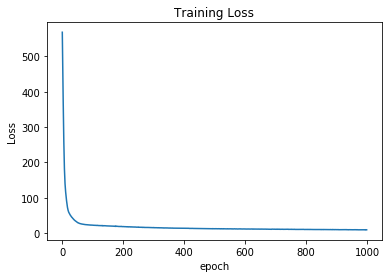

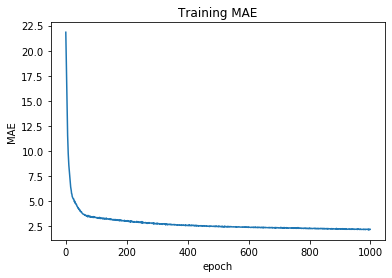

In [17]:
def plot_learning_curve(history):
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.show()
    plt.plot(history.history['mae'])
    plt.title('Training MAE')
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    plt.show()
plot_learning_curve(clf.history)

## 7 - Exploring Model Parameters

In [49]:
print(f'Model weights = \n {clf.get_weights()}')

Model weights = 
 [array([[-0.34176114, -0.20444523, -0.33484566, ...,  0.04795467,
        -0.21849991,  0.05898421],
       [ 0.13970768,  0.06154178,  0.18185054, ..., -0.02471063,
        -0.06726149, -0.10609649],
       [ 0.05101351, -0.16674873,  0.14792036, ..., -0.09442123,
         0.16163407,  0.12129083],
       ...,
       [ 0.10537621, -0.04935675, -0.00300199, ..., -0.14046764,
        -0.11122495, -0.10730931],
       [ 0.04949609,  0.28859273, -0.09462877, ...,  0.06117075,
         0.04202529, -0.12291943],
       [-0.13994485, -0.3743731 , -0.1893397 , ..., -0.03356833,
        -0.01659575, -0.12861831]], dtype=float32), array([ 0.51652867,  0.32447895,  0.51400536, -0.3358101 ,  0.        ,
        0.        , -0.01603675,  0.32504892, -0.03174132, -0.00316219,
       -0.63227093,  0.50998026,  0.506888  ,  0.51385075, -0.04994085,
        0.5080765 ,  0.51409274,  0.        , -0.29002947,  0.508451  ,
       -0.01513533, -0.03451186,  0.51210225, -0.01604765, -0.01

## 8 - Tuning Model hyperparameters

In [27]:
def nn_model(X_train, Y_train, hidden_layers=1, neurons=256, epochs=1000, learning_rate=0.001):
    clf = Sequential()
    clf.add(Dense(units=neurons, activation='relu', input_shape=(13,)))
    for i in range(hidden_layers-1):
        clf.add(Dense(units=neurons, activation='relu'))
        
    clf.add(Dense(units=1, activation='linear'))
    clf.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    clf.fit(X_train, Y_train, batch_size=32, validation_split=0.2, epochs=epochs, verbose=False)
    return clf

In [35]:
# Increase number of hidden layers
clf = nn_model(X_train, Y_train, hidden_layers=2 , neurons=256, epochs=1000)
train_metrics = clf.evaluate(X_train, Y_train)
test_metrics = clf.evaluate(X_test, Y_test)
print(f'Train Loss = {train_metrics[0]}, mae = {train_metrics[1]} ')
print(f'Test Loss = {test_metrics[0]}, mae = {test_metrics[1]} ')

51/51 [==============================] - 0s 826us/step
Train Loss = 2.1430981028210985, mae = 0.925952672958374 
Test Loss = 11.533160639744178, mae = 2.1609060764312744 


In [36]:
Y_pred = clf.predict(X_test)
pd.DataFrame(np.hstack([Y_pred, Y_test.values[:, np.newaxis], np.abs(Y_pred-Y_test.values[:, np.newaxis])]),
             columns=['Predicted', 'Actual', 'MAE'])

,Predicted,Actual,MAE
0,27.453541,23.6,3.853541
1,32.694942,32.4,0.294942
2,16.635893,13.6,3.035893
3,23.341984,22.8,0.541984
4,18.489191,16.1,2.389191
5,21.760431,20.0,1.760431
6,20.193823,17.8,2.393823
7,16.392029,14.0,2.392029
8,24.314812,19.6,4.714812
9,20.494827,16.8,3.694827


In [37]:
# Decrease number of hidden neurons
clf = nn_model(X_train, Y_train, hidden_layers=2 , neurons=32, epochs=1000)
train_metrics = clf.evaluate(X_train, Y_train)
test_metrics = clf.evaluate(X_test, Y_test)
print(f'Train Loss = {train_metrics[0]}, mae = {train_metrics[1]} ')
print(f'Test Loss = {test_metrics[0]}, mae = {test_metrics[1]} ')

51/51 [==============================] - 0s 206us/step
Train Loss = 6.086328955011053, mae = 1.7768644094467163 
Test Loss = 8.401299121333103, mae = 2.142043113708496 


In [38]:
Y_pred = clf.predict(X_test)
pd.DataFrame(np.hstack([Y_pred, Y_test.values[:, np.newaxis], np.abs(Y_pred-Y_test.values[:, np.newaxis])]),
             columns=['Predicted', 'Actual', 'MAE'])

,Predicted,Actual,MAE
0,26.988781,23.6,3.388781
1,31.367445,32.4,1.032555
2,15.406576,13.6,1.806576
3,25.094824,22.8,2.294824
4,16.518213,16.1,0.418213
5,21.577982,20.0,1.577982
6,19.102295,17.8,1.302295
7,15.513959,14.0,1.513959
8,23.144897,19.6,3.544897
9,19.304686,16.8,2.504686


In [39]:
# Increase number of hidden layers and Decrease number of hidden neurons! 
clf = nn_model(X_train, Y_train, hidden_layers=3 , neurons=16, epochs=1000)
train_metrics = clf.evaluate(X_train, Y_train)
test_metrics = clf.evaluate(X_test, Y_test)
print(f'Train Loss = {train_metrics[0]}, mae = {train_metrics[1]} ')
print(f'Test Loss = {test_metrics[0]}, mae = {test_metrics[1]} ')

51/51 [==============================] - 0s 173us/step
Train Loss = 7.345876667525742, mae = 1.9173424243927002 
Test Loss = 6.298856604333017, mae = 1.8177618980407715 


In [40]:
Y_pred = clf.predict(X_test)
pd.DataFrame(np.hstack([Y_pred, Y_test.values[:, np.newaxis], np.abs(Y_pred-Y_test.values[:, np.newaxis])]),
             columns=['Predicted', 'Actual', 'MAE'])

,Predicted,Actual,MAE
0,24.654657,23.6,1.054657
1,31.528280,32.4,0.871720
2,12.646070,13.6,0.953930
3,22.472269,22.8,0.327731
4,16.408958,16.1,0.308958
5,19.212172,20.0,0.787828
6,17.815571,17.8,0.015571
7,13.489441,14.0,0.510559
8,23.637598,19.6,4.037598
9,19.240616,16.8,2.440616
